In [1]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 23.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/모델링데이터/df_1_label.csv")

## RandomForest only use and evaluation


In [4]:
!pip install koreanize-matplotlib

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import koreanize_matplotlib


In [7]:
path = "/content/drive/MyDrive/Colab Notebooks/모델링데이터/df_1_label.csv"
df = pd.read_csv(path)
df.head()

보증금만원  계약분기  건축년도  계약연도  계약개월수   층   전용면적m  계약구분보완(범주)  거래량  갱신요구권사용(2진)  \
0  38000.0     2  2004  2019     24  18  59.700           1   86            0   
1  51500.0     2  2000  2019     24  12  84.710           1  373            0   
2  47000.0     2  2000  2019     24   2  84.870           1  509            0   
3  70000.0     2  2017  2019     24   8  84.614           1  107            0   
4  70000.0     2  2017  2019     24   6  84.836           1  106            0   

   종전계약유무(2진)  구_단지별_이상치만원(2진)  클러스터   지하철_거리(m)  초등학교 거리(미터)    Index  Rate  \
0           0                0    16  386.605843   342.200105  2203.59  1.75   
1           0                0    29  331.830814   451.914304  2203.59  1.75   
2           0                0    18  201.533731   357.832334  2203.59  1.75   
3           0                0     9  566.332822   231.623284  2203.59  1.75   
4           0                0    14  566.332822   231.623284  2203.59  1.75   

     PpRate      보증금면적비  
0  5.285769  636.515913  
1  5.285769  607.956558  
2  5.285769  553.788147  
3  5.285769  827.286265  
4  5.285769  825.121411

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# ✅ Feature & Target 설정
li = ["전용면적m", "보증금면적비", "클러스터", "건축년도", "층", "거래량", "지하철_거리(m)", "초등학교 거리(미터)", "계약연도", "Index"]
X = df[li]  # "보증금만원"이 Target 변수

y = df["보증금만원"]

# ✅ 학습 데이터 & 테스트 데이터 분리 (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"📌 학습 데이터 크기: {X_train.shape}, 테스트 데이터 크기: {X_test.shape}")

📌 학습 데이터 크기: (718442, 10), 테스트 데이터 크기: (179611, 10)


In [11]:
y

0         38000.0
1         51500.0
2         47000.0
3         70000.0
4         70000.0
           ...   
898048    10500.0
898049    20700.0
898050    21300.0
898051    13320.0
898052    21300.0
Name: 보증금만원, Length: 898053, dtype: float64

In [13]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 로그 변환 (오른쪽 꼬리 긴 변수)
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

X_train['전용면적m'] = np.log1p(X_train['전용면적m'])
X_test['전용면적m'] = np.log1p(X_test['전용면적m'])

X_train['보증금면적비'] = np.log1p(X_train['보증금면적비'])
X_test['보증금면적비'] = np.log1p(X_test['보증금면적비'])

# MinMax 스케일링 (거리 변수)
scaler = MinMaxScaler()
X_train[['지하철_거리(m)', '초등학교 거리(미터)']] = scaler.fit_transform(X_train[['지하철_거리(m)', '초등학교 거리(미터)']])
X_test[['지하철_거리(m)', '초등학교 거리(미터)']] = scaler.transform(X_test[['지하철_거리(m)', '초등학교 거리(미터)']])


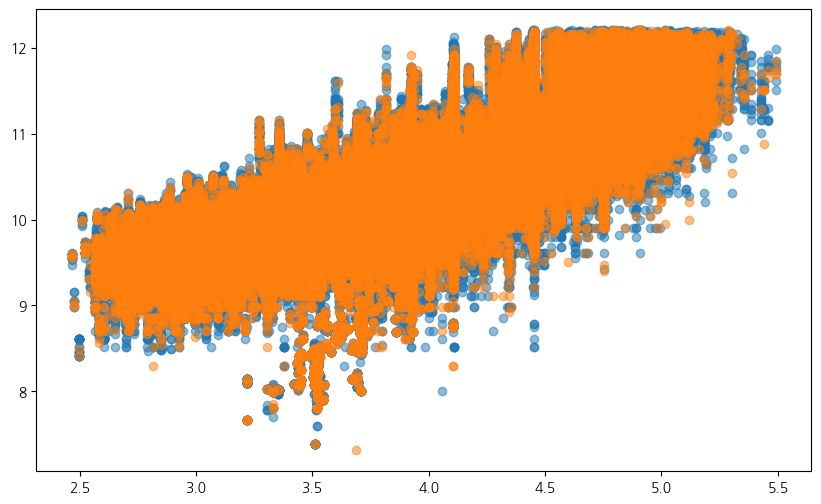

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train['전용면적m'], y_train, label='Train', alpha=0.5)
plt.scatter(X_test['전용면적m'], y_test, label='Test', alpha=0.5)

## 랜덤포레스트 하이퍼 파라미터 설정 모델: `rf_model`
- `n_estimators=300`,  # 트리 개수
- `max_depth=15`,  # 트리 깊이 제한
- `min_samples_split=5`,  # 노드 분할 최소 샘플 개수
- `min_samples_leaf=2`,  # 리프 노드 최소 샘플 개수
- `max_features= 7`,  # 사용할 Feature 개수 통상적으로 회귀 모델에서는 `Feature/3`
-` random_state=42`

In [54]:
# ✅ 랜덤포레스트 모델 생성
rf_model = RandomForestRegressor(
    n_estimators=500,  # 트리 개수
    max_depth=18,  # 트리 깊이 제한
    min_samples_split=10,  # 노드 분할 최소 샘플 개수
    min_samples_leaf=2,  # 리프 노드 최소 샘플 개수
    max_features= 5,  # 사용할 Feature 개수
    random_state=42,
)

# ✅ 모델 학습
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=18, max_features=5, min_samples_leaf=2,
                      min_samples_split=10, n_estimators=500, random_state=42)

In [55]:
# TEST data
y_pred_rf_log = rf_model.predict(X_test)

y_pred_rf = np.expm1(y_pred_rf_log)
y_test_original = np.expm1(y_test)  # y_test도 원래 값으로 복원

In [56]:
# 성능 평가
mae_rf = mean_absolute_error(y_test_original, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test_original, y_pred_rf))
print(f"[랜덤포레스트 모델] \n 트리 개수: 500\n 트리 깊이 제한=18 \n 노드 분할 최소 샘플 개수: 10 \n 리프 노드 최소 샘플 개수: 2 \n 속성 제한: 5 \n random_state: 42 \n \n MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}")

[랜덤포레스트 모델] 
 트리 개수: 500
 트리 깊이 제한=18 
 노드 분할 최소 샘플 개수: 10 
 리프 노드 최소 샘플 개수: 2 
 속성 제한: 5 
 random_state: 42 
 
 MAE: 121.99, RMSE: 381.43


In [59]:
residuals = y_test_original - y_pred_rf

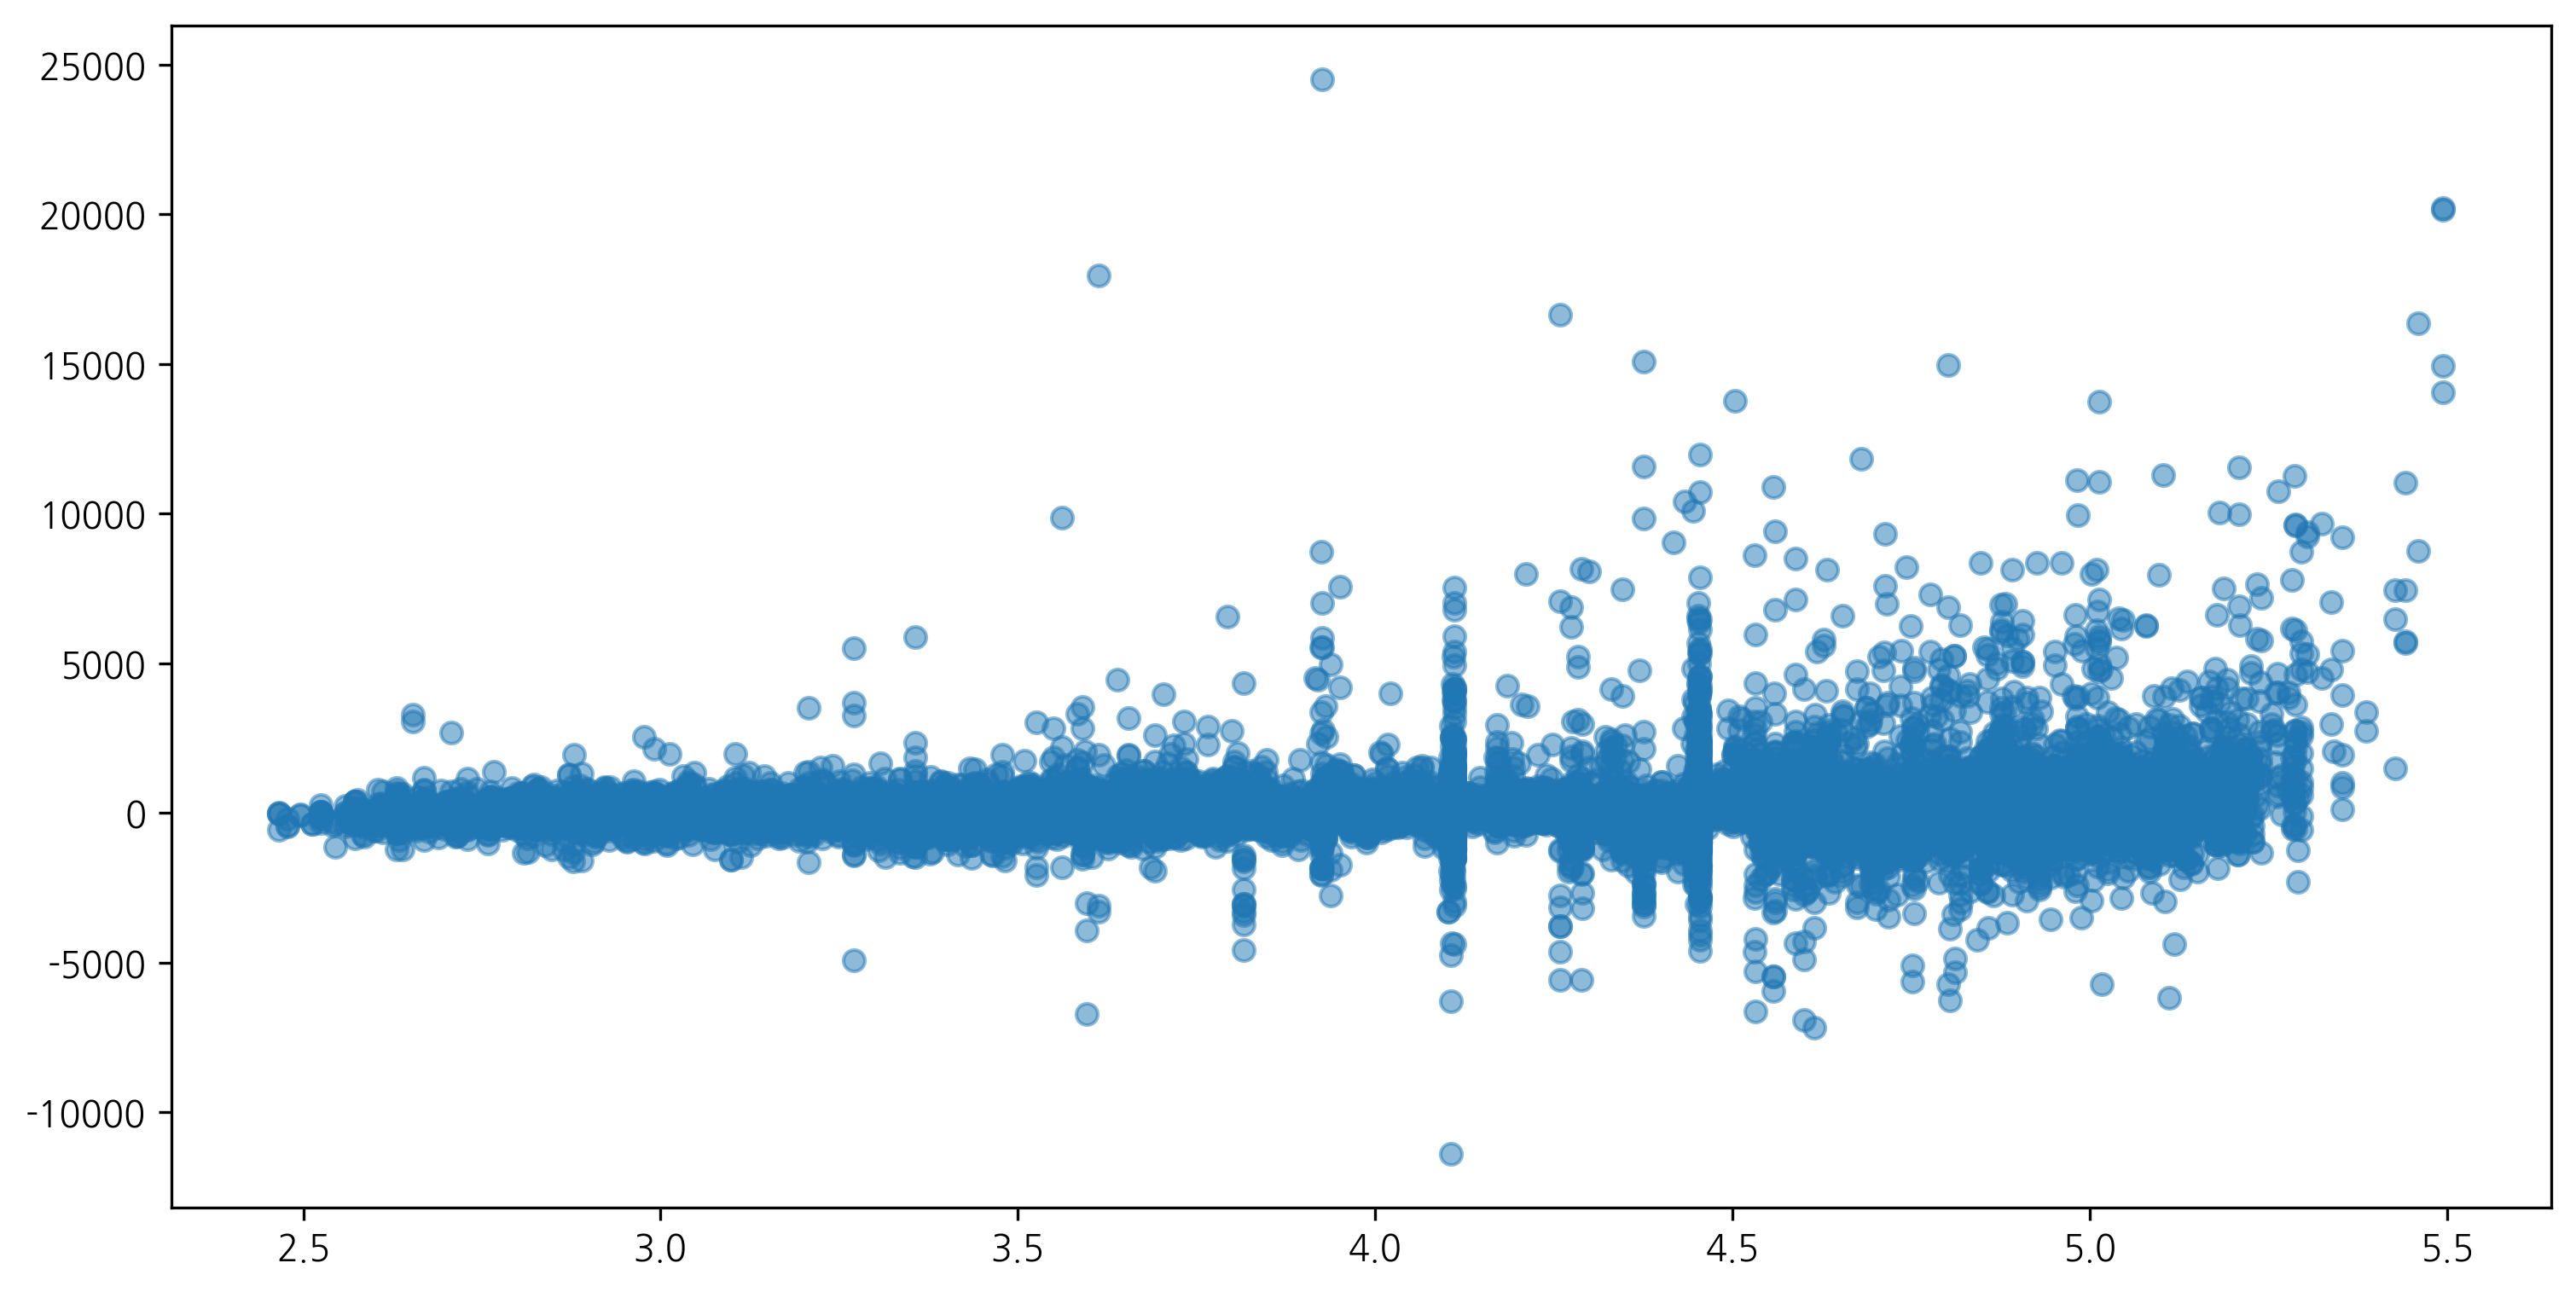

In [60]:
plt.figure(figsize=(12, 6), dpi=300)
plt.scatter(X_test['전용면적m'], residuals, label='Test', alpha=0.5)
plt.show()

# 결과 탐색

- 잔차분석
- 주요변수 추출

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

def analyze_residual_distribution(model_name, y_test, y_pred, dpi=500):
    """
    모델의 잔차/실제값 비율을 분석하여 KDE 그래프 & QQ-Plot을 고화질(DPI 설정)로 생성하는 함수.

    Parameters:
    - model_name: 모델 이름 (str) (예: "RandomForest_1", "XGBoost_2")
    - y_test: 실제값 (numpy array 또는 pandas Series)
    - y_pred: 예측값 (numpy array 또는 pandas Series)
    - dpi: 그래프 해상도 설정 (기본값: 500)

    Returns:
    - relative_residual: 잔차/실제값 비율 (numpy array)
    """
    # ✅ 잔차 및 상대 오차 계산
    residuals = y_test - y_pred
    relative_residual = (residuals / (y_test + 1e+02)) * 100  # 퍼센트 변환 (실제값 기준)

    fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=dpi)  # ✅ 고화질 설정

    # ✅ KDE(커널 밀도) 그래프
    sns.kdeplot(relative_residual, fill=True, color="purple", alpha=0.6, ax=axes[0])
    axes[0].axvline(0, color="black", linestyle="--")  # 0 기준선 추가
    axes[0].set_xlabel("Relative Residual [(Residuals / Observed Values) × 100]", fontsize=14)
    axes[0].set_ylabel("Density", fontsize=14)
    axes[0].set_title(f"KDE Plot of Relative Residual (%) ({model_name})", fontsize=16, fontweight='bold')
    axes[0].grid(axis='x', linestyle="--", alpha=0.7)

    # ✅ QQ-Plot (표준화된 잔차 사용)
    standardized_residuals = (residuals - np.mean(residuals)) / (np.std(residuals) + 1e-10)  # 표준화된 잔차
    stats.probplot(standardized_residuals, dist="norm", plot=axes[1])
    axes[1].set_title(f"QQ Plot of Standardized Residuals ({model_name})", fontsize=16, fontweight='bold')
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

    return relative_residual

# ✅ 사용 예제 (모델별 실행)
# relative_residual_rf = analyze_residual_distribution("RandomForest", y_test, y_pred_rf)
# relative_residual_xgb = analyze_residual_distribution("XGBoost", y_test, y_pred_xgb)

## 잔차비를 퍼센트로 전환

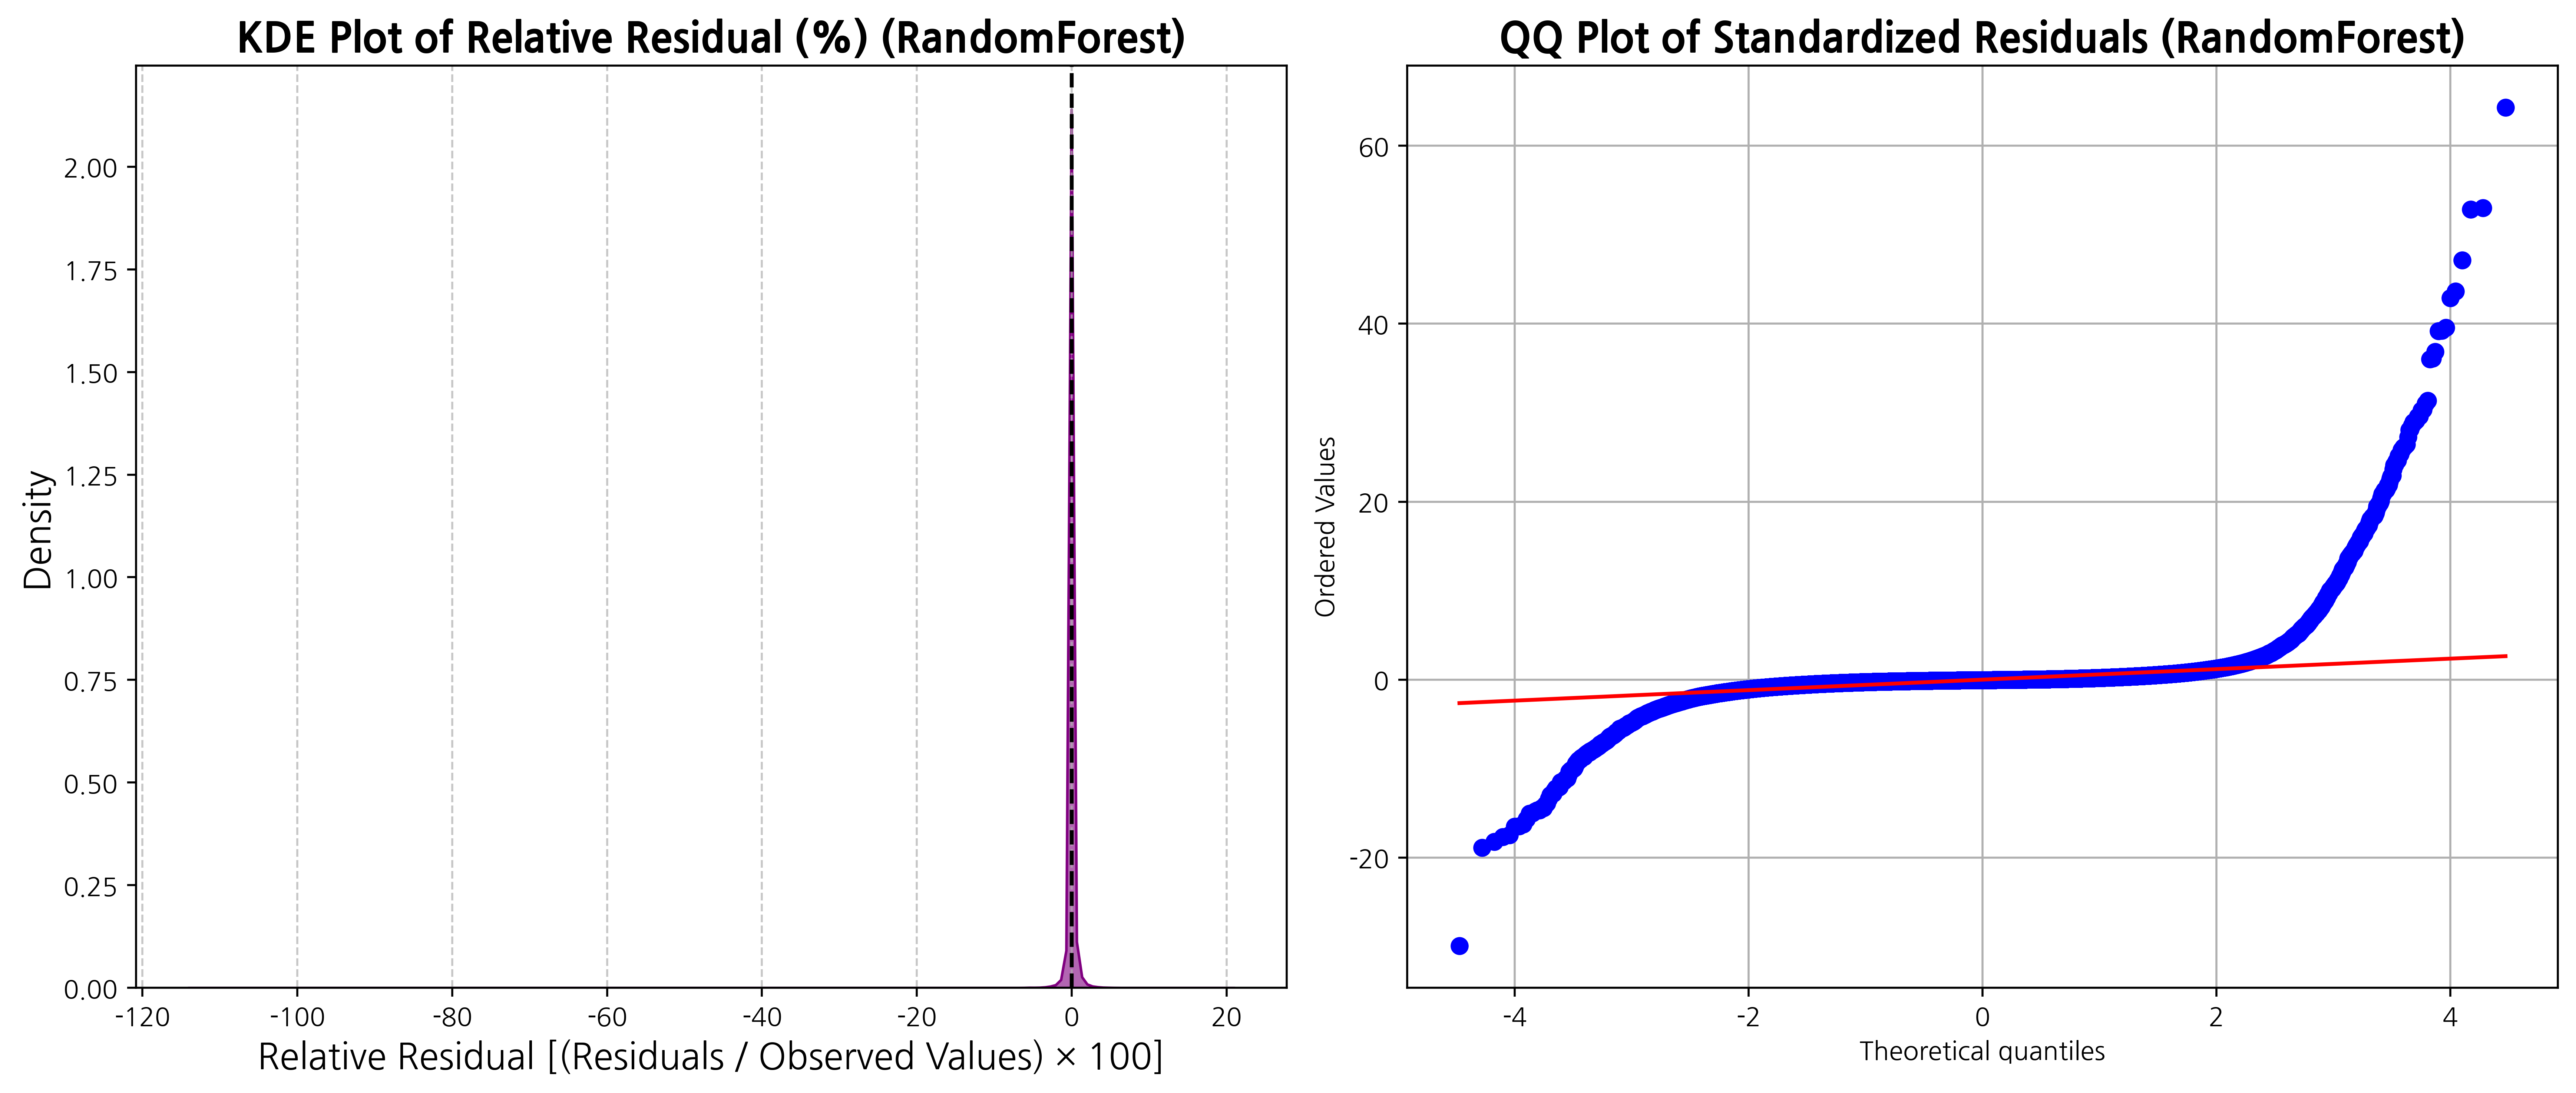

In [62]:
# ✅ 랜덤포레스트 1번째 모델 결과 분석 (고화질)
residual_ratio_rf_1 = analyze_residual_distribution("RandomForest", y_test_original, y_pred_rf, dpi=500)

# residual_ratio_rf_2 = analyze_residual_distribution("RandomForest2", y_test, y_pred_rf_2, dpi=500)

# residual_ratio_rf_3 = analyze_residual_distribution("RandomForest3", y_test, y_pred_rf_3, dpi=500)

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_residuals_scatter(residuals, feature_values, feature_name, model_name):
    """
    특정 Feature에 따른 잔차의 산점도(Scatter Plot)를 시각화하는 함수.

    Parameters:
    - residuals: 모델의 잔차 값 (y_test - y_pred)
    - feature_values: 특정 Feature의 값 (예: 단지 클러스터, 면적 등)
    - feature_name: Feature 이름 (문자열, 그래프 제목용)
    - model_name: 모델 이름 (문자열, 그래프 제목용)

    Returns:
    - 시각화된 산점도 그래프
    """
    plt.figure(figsize=(12, 6), dpi=300)

    # ✅ 산점도 플롯
    sns.scatterplot(x=feature_values, y=residuals, color="red", alpha=0.6, edgecolor="black")
    plt.axhline(0, color="black", linestyle="--")  # 기준선 추가
    plt.xlabel(feature_name, fontsize=12)
    plt.ylabel("Absolute Residuals", fontsize=12)
    plt.title(f"Absolute residuals (%) Scatter Plot by {feature_name} ({model_name})", fontsize=14, fontweight="bold")
    plt.grid(axis="y", linestyle="--", alpha=0.6)

    plt.show()

# ✅ 사용 예제
# plot_residuals_scatter(residuals, X_test["단지클러스터"], "단지 클러스터", "RandomForest")
# plot_residuals_scatter(residuals, X_test["전용면적m"], "전용면적 (㎡)", "RandomForest")

In [64]:
residuals = abs(y_test_original - y_pred_rf)
residual_ratio = (residuals / (y_test_original+ 100)) * 100  # 퍼센트 변환


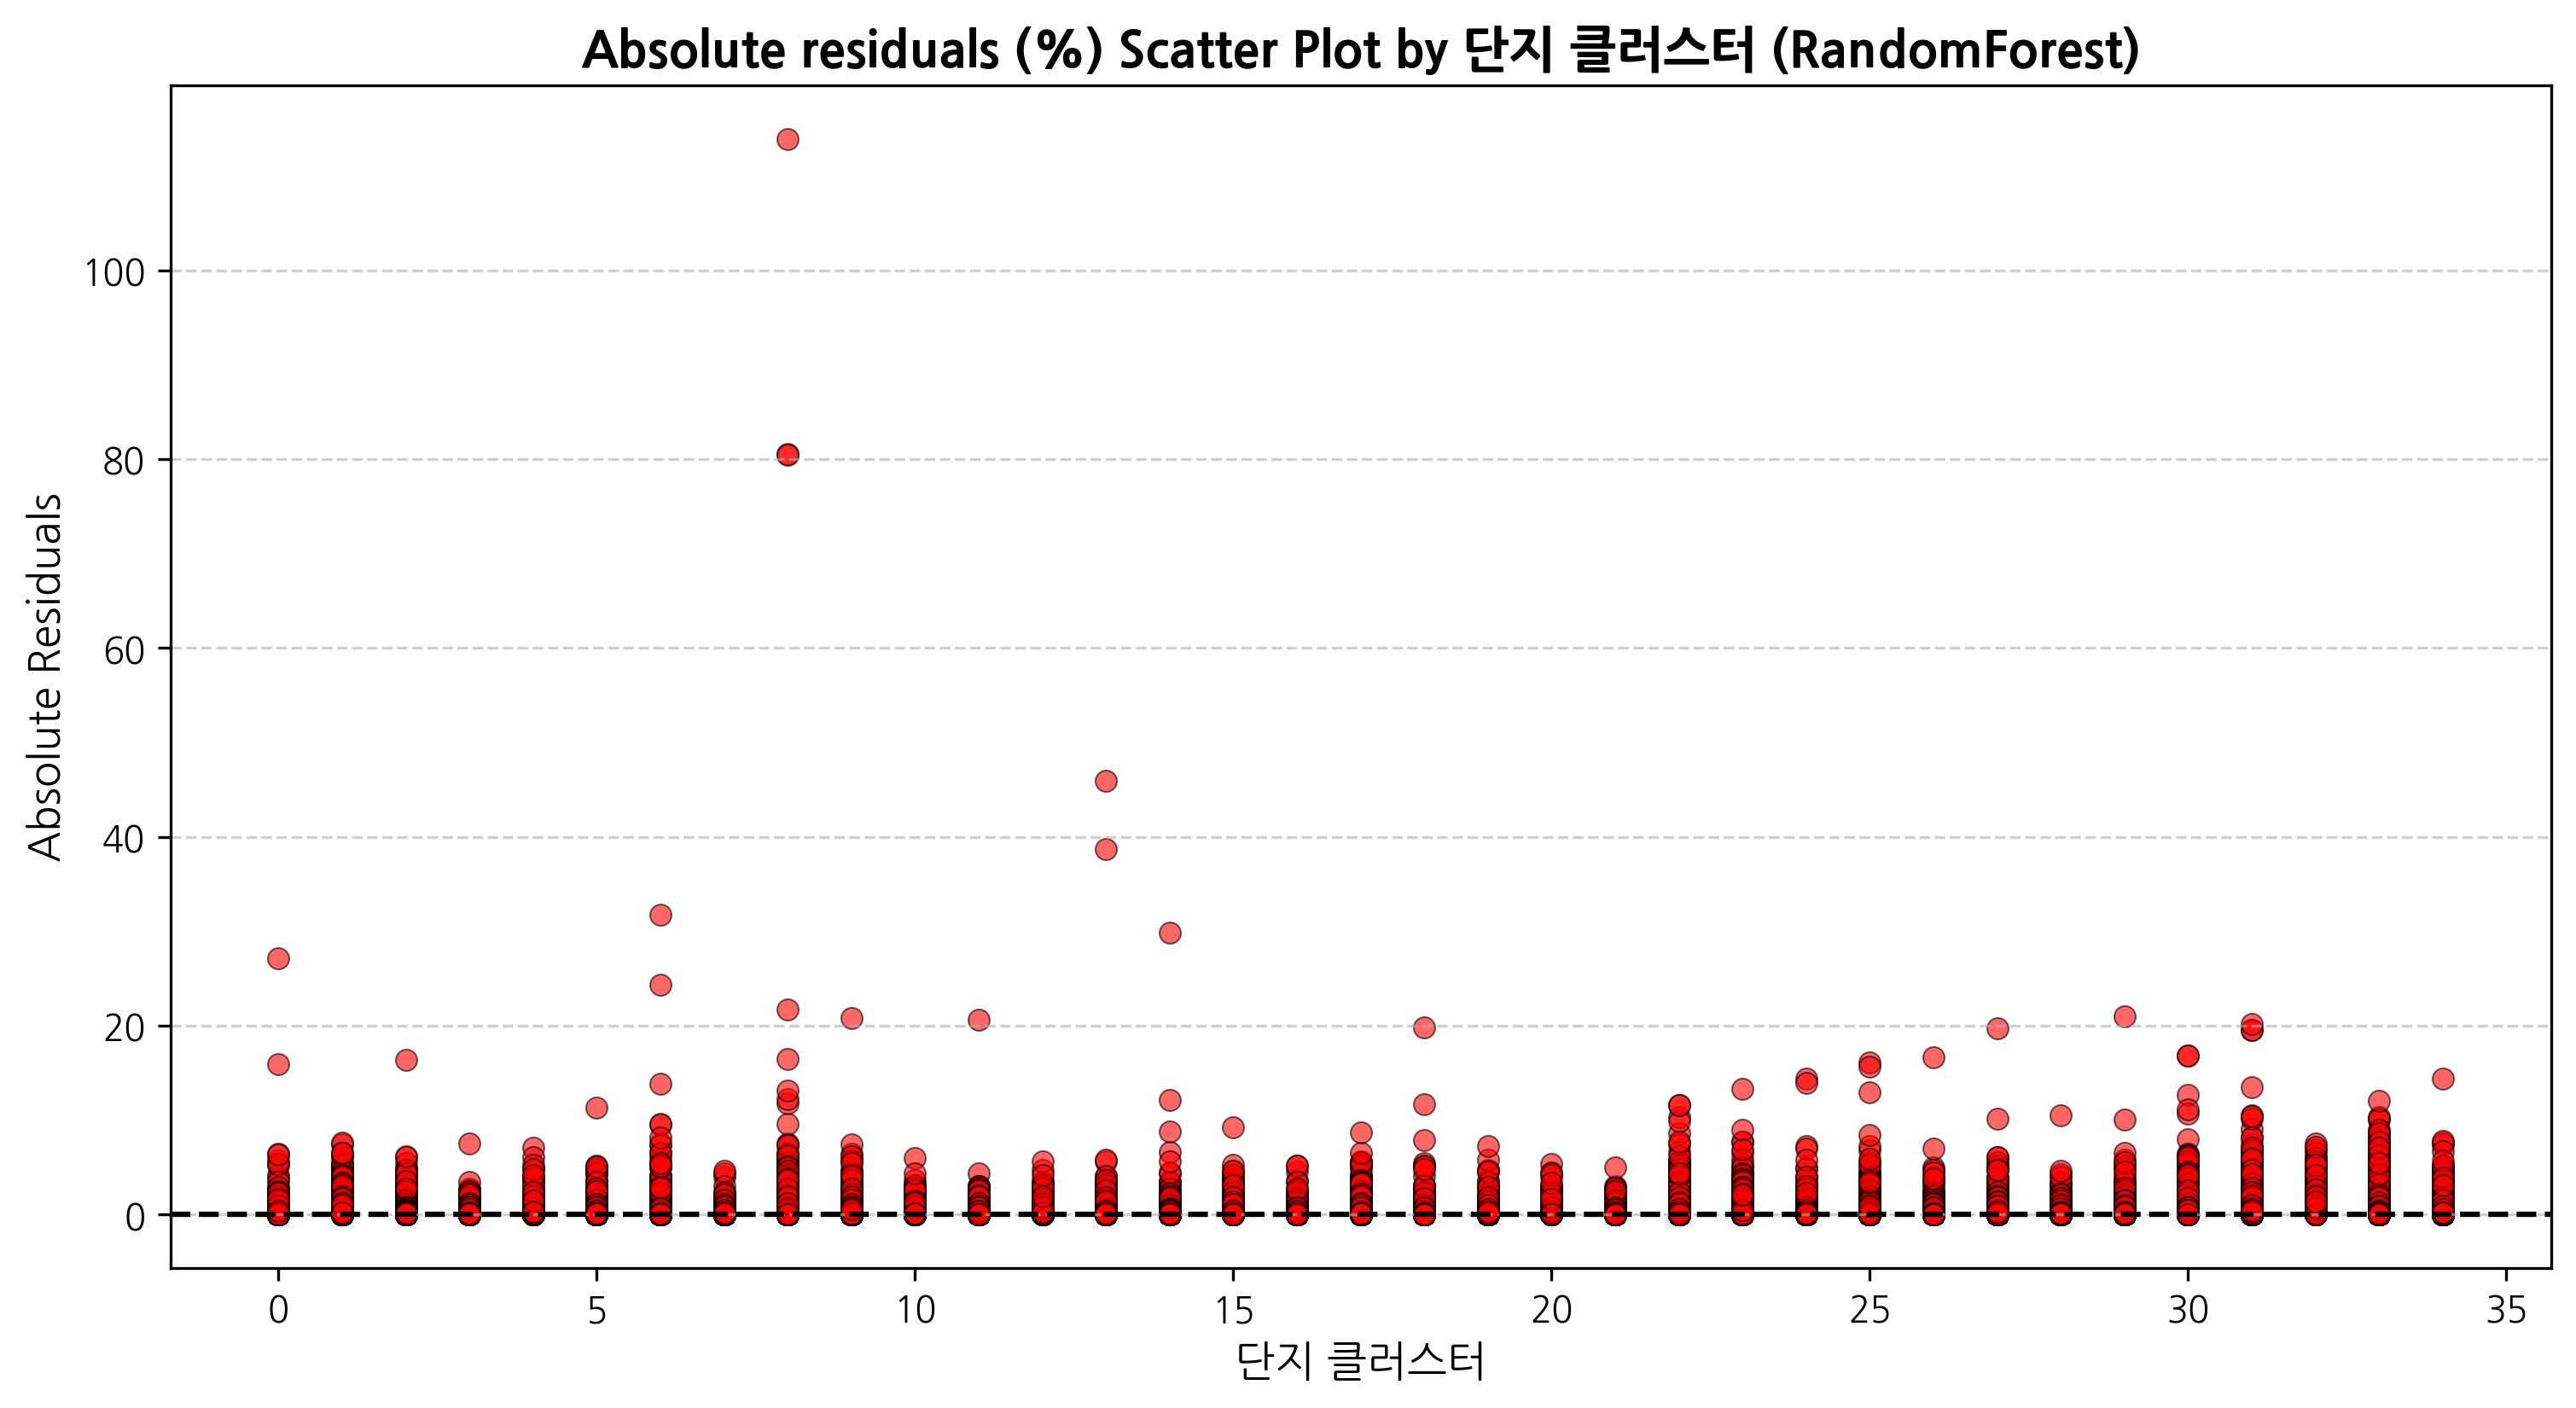

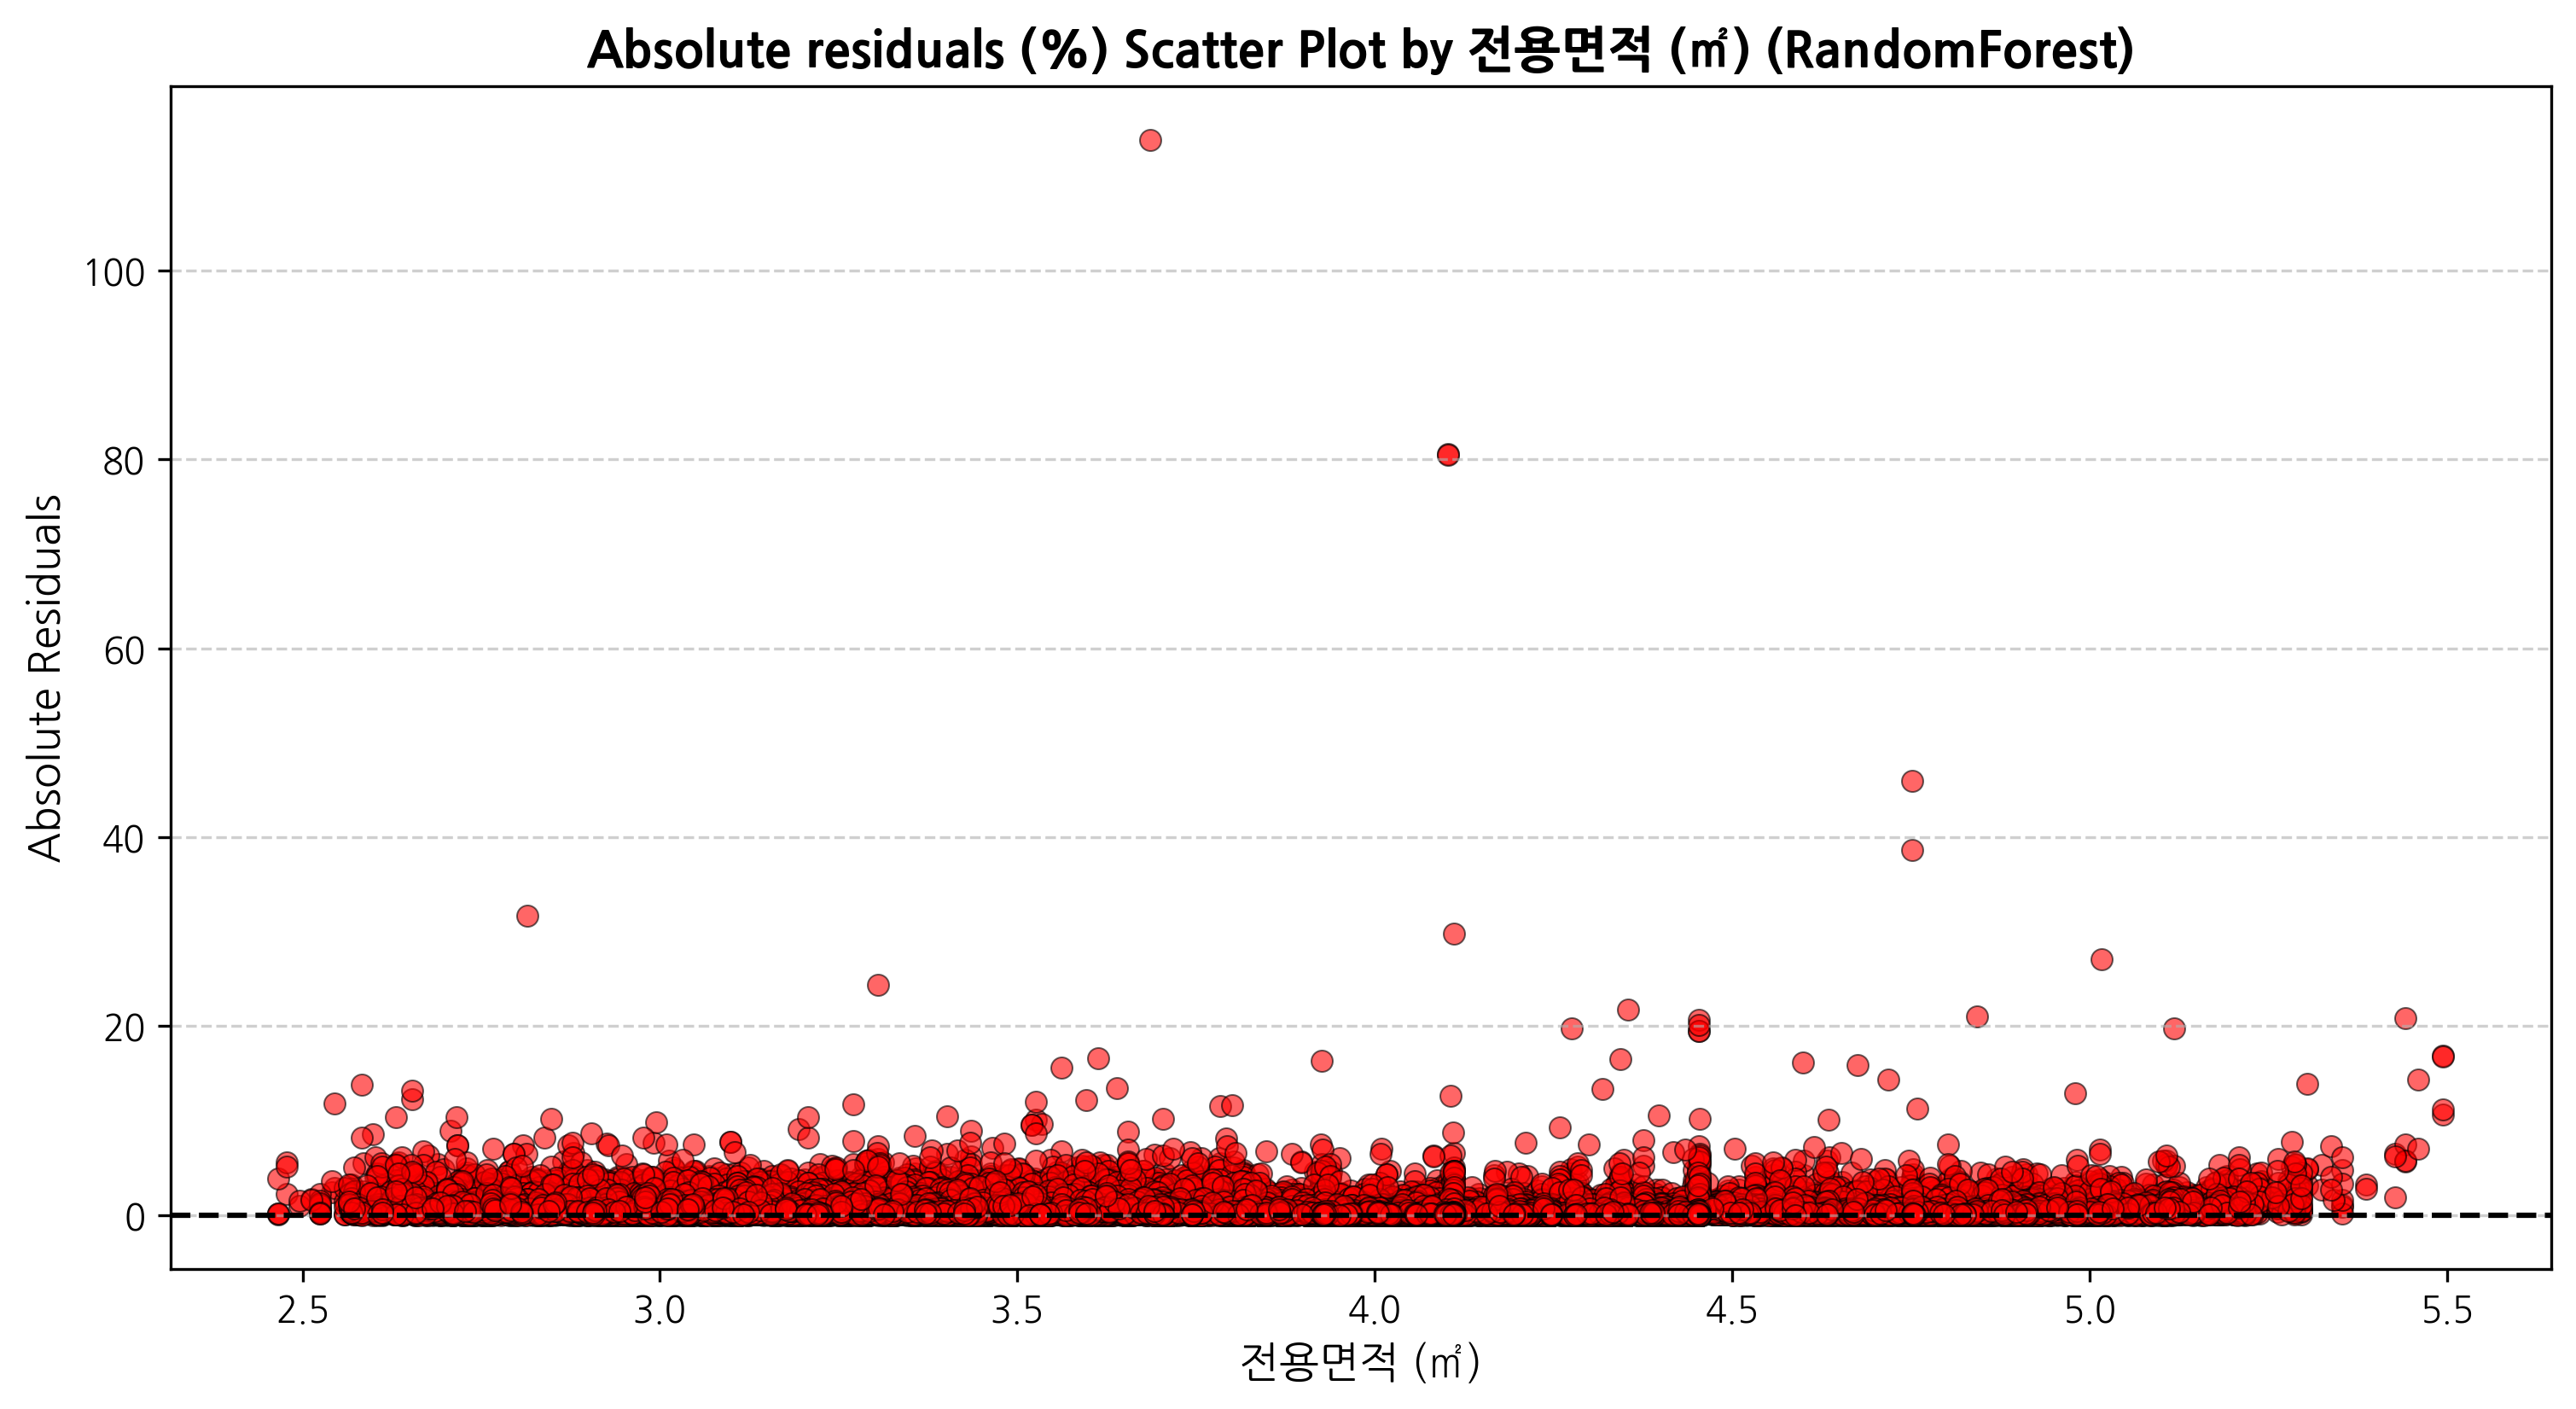

In [65]:
# ✅ 사용 예제
plot_residuals_scatter(residual_ratio, X_test["클러스터"], "단지 클러스터", "RandomForest")
plot_residuals_scatter(residual_ratio, X_test["전용면적m"], "전용면적 (㎡)", "RandomForest")

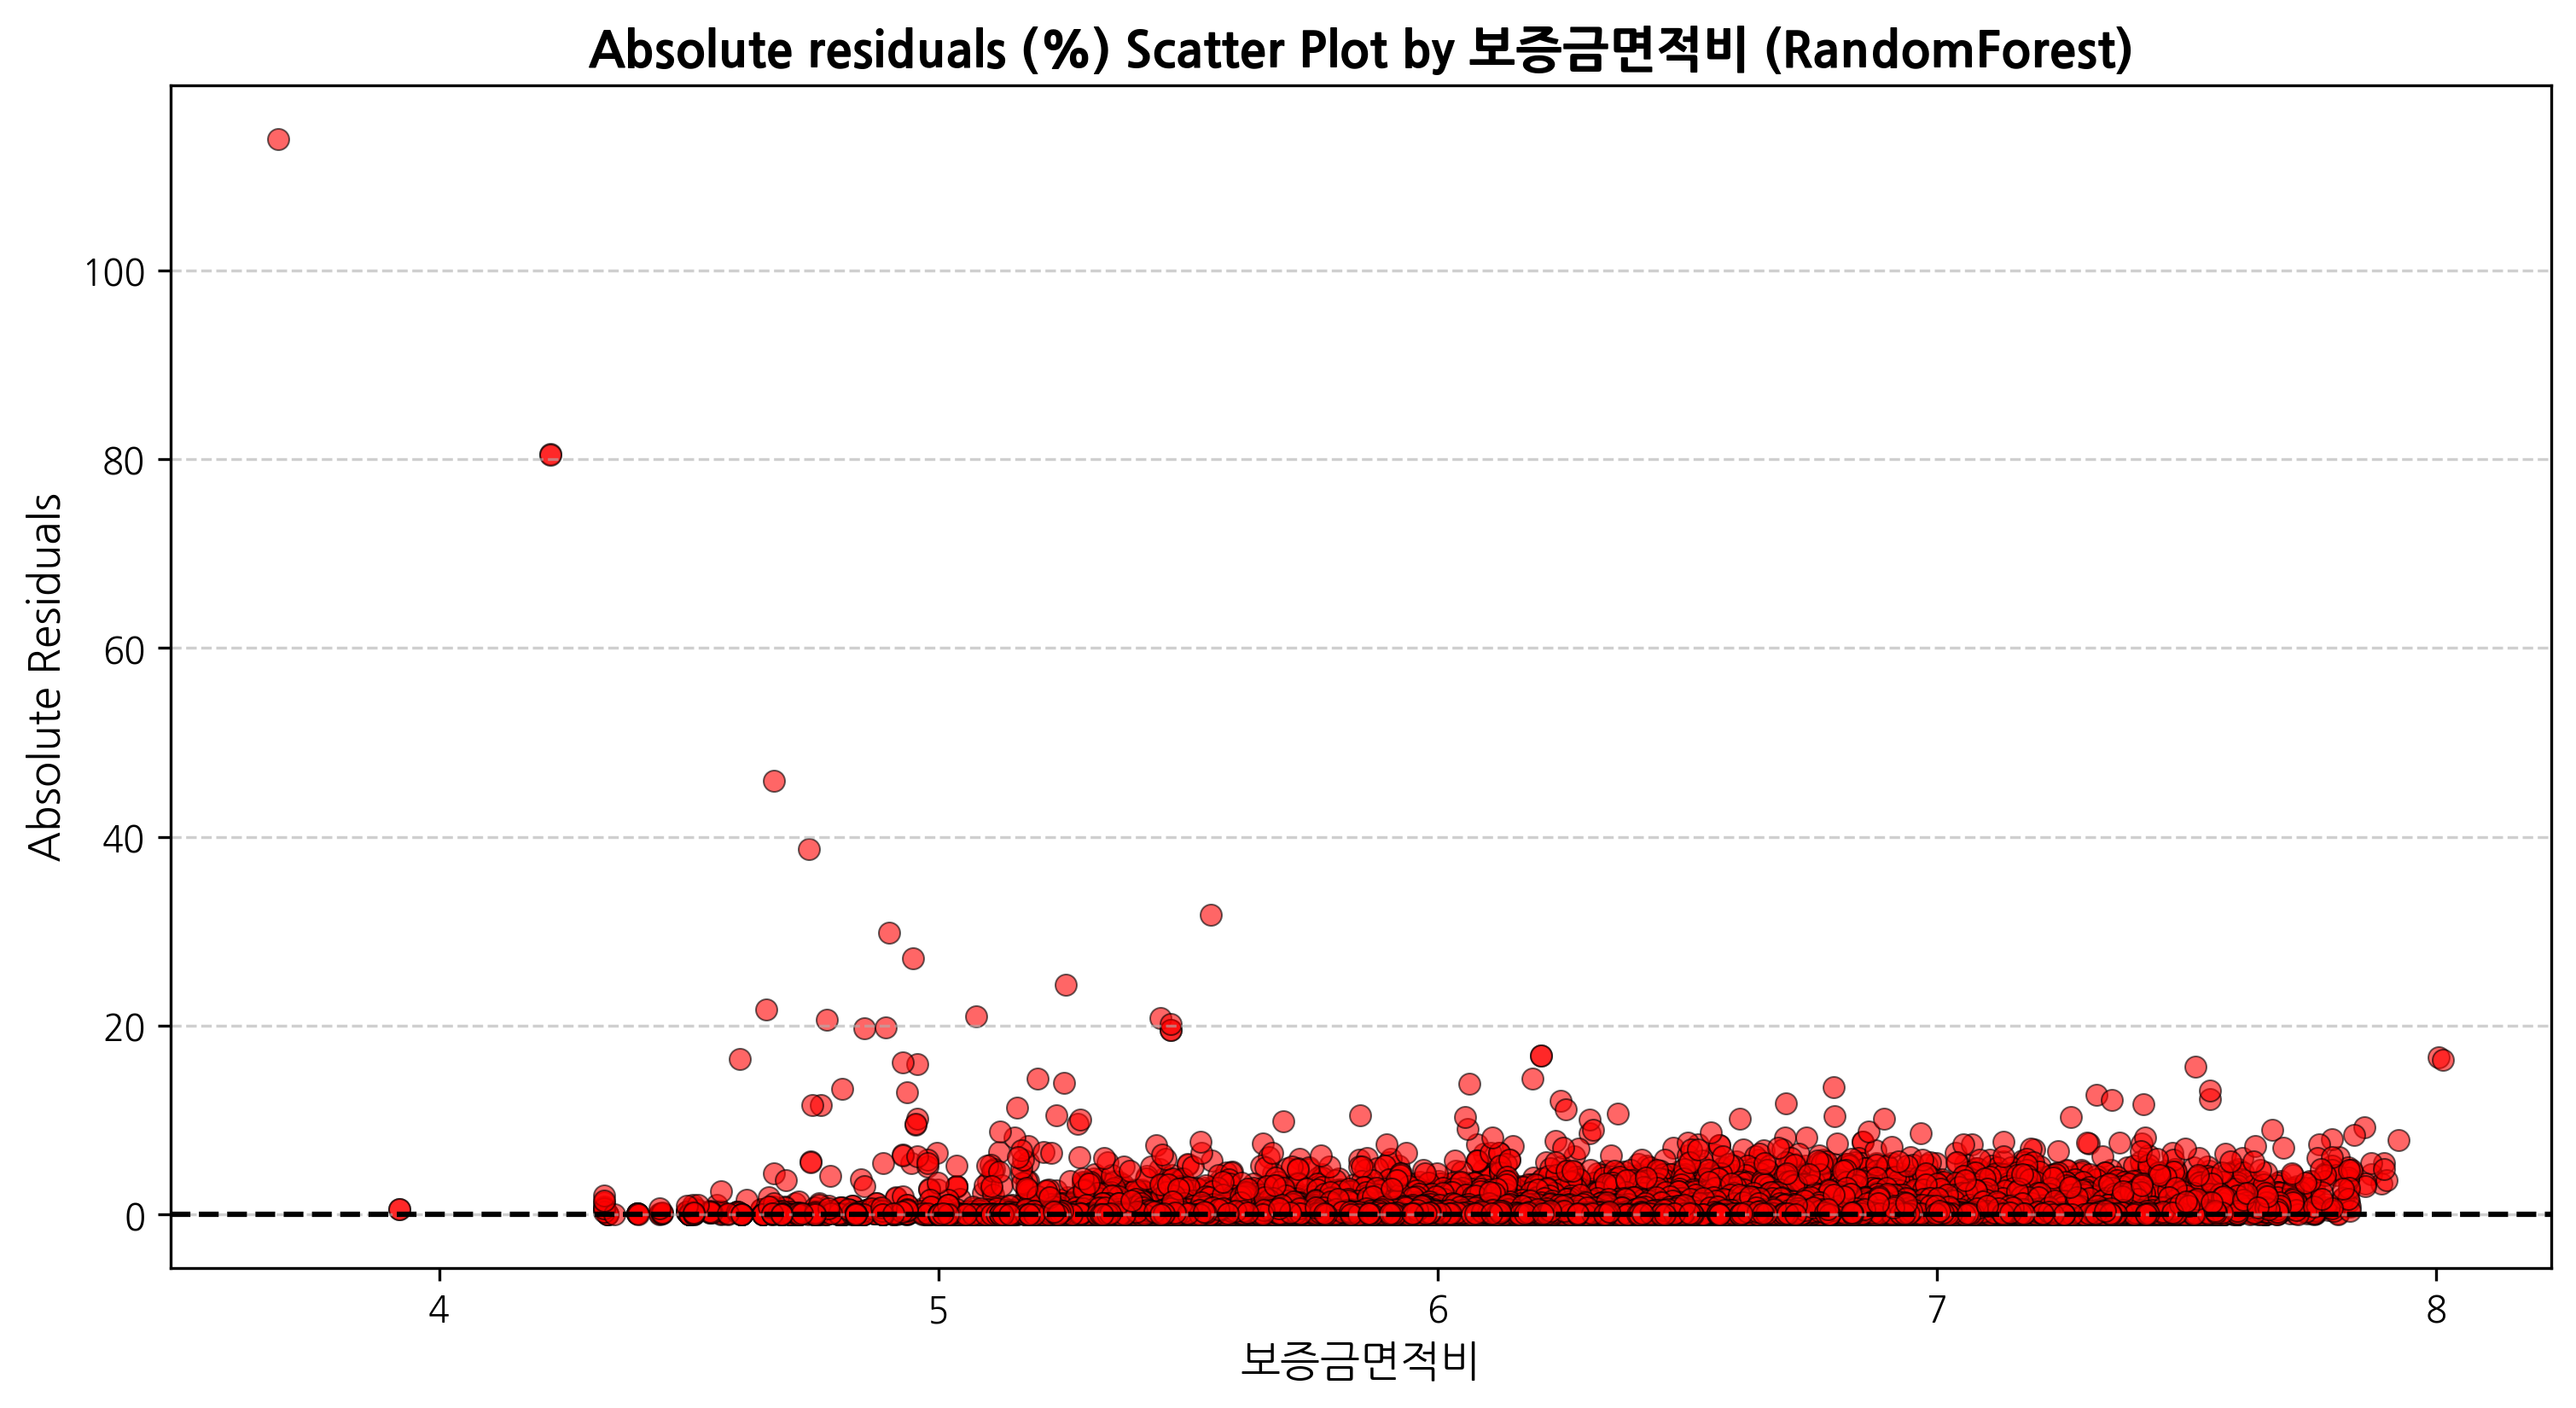

In [66]:
plot_residuals_scatter(residual_ratio, X_test["보증금면적비"], "보증금면적비", "RandomForest")

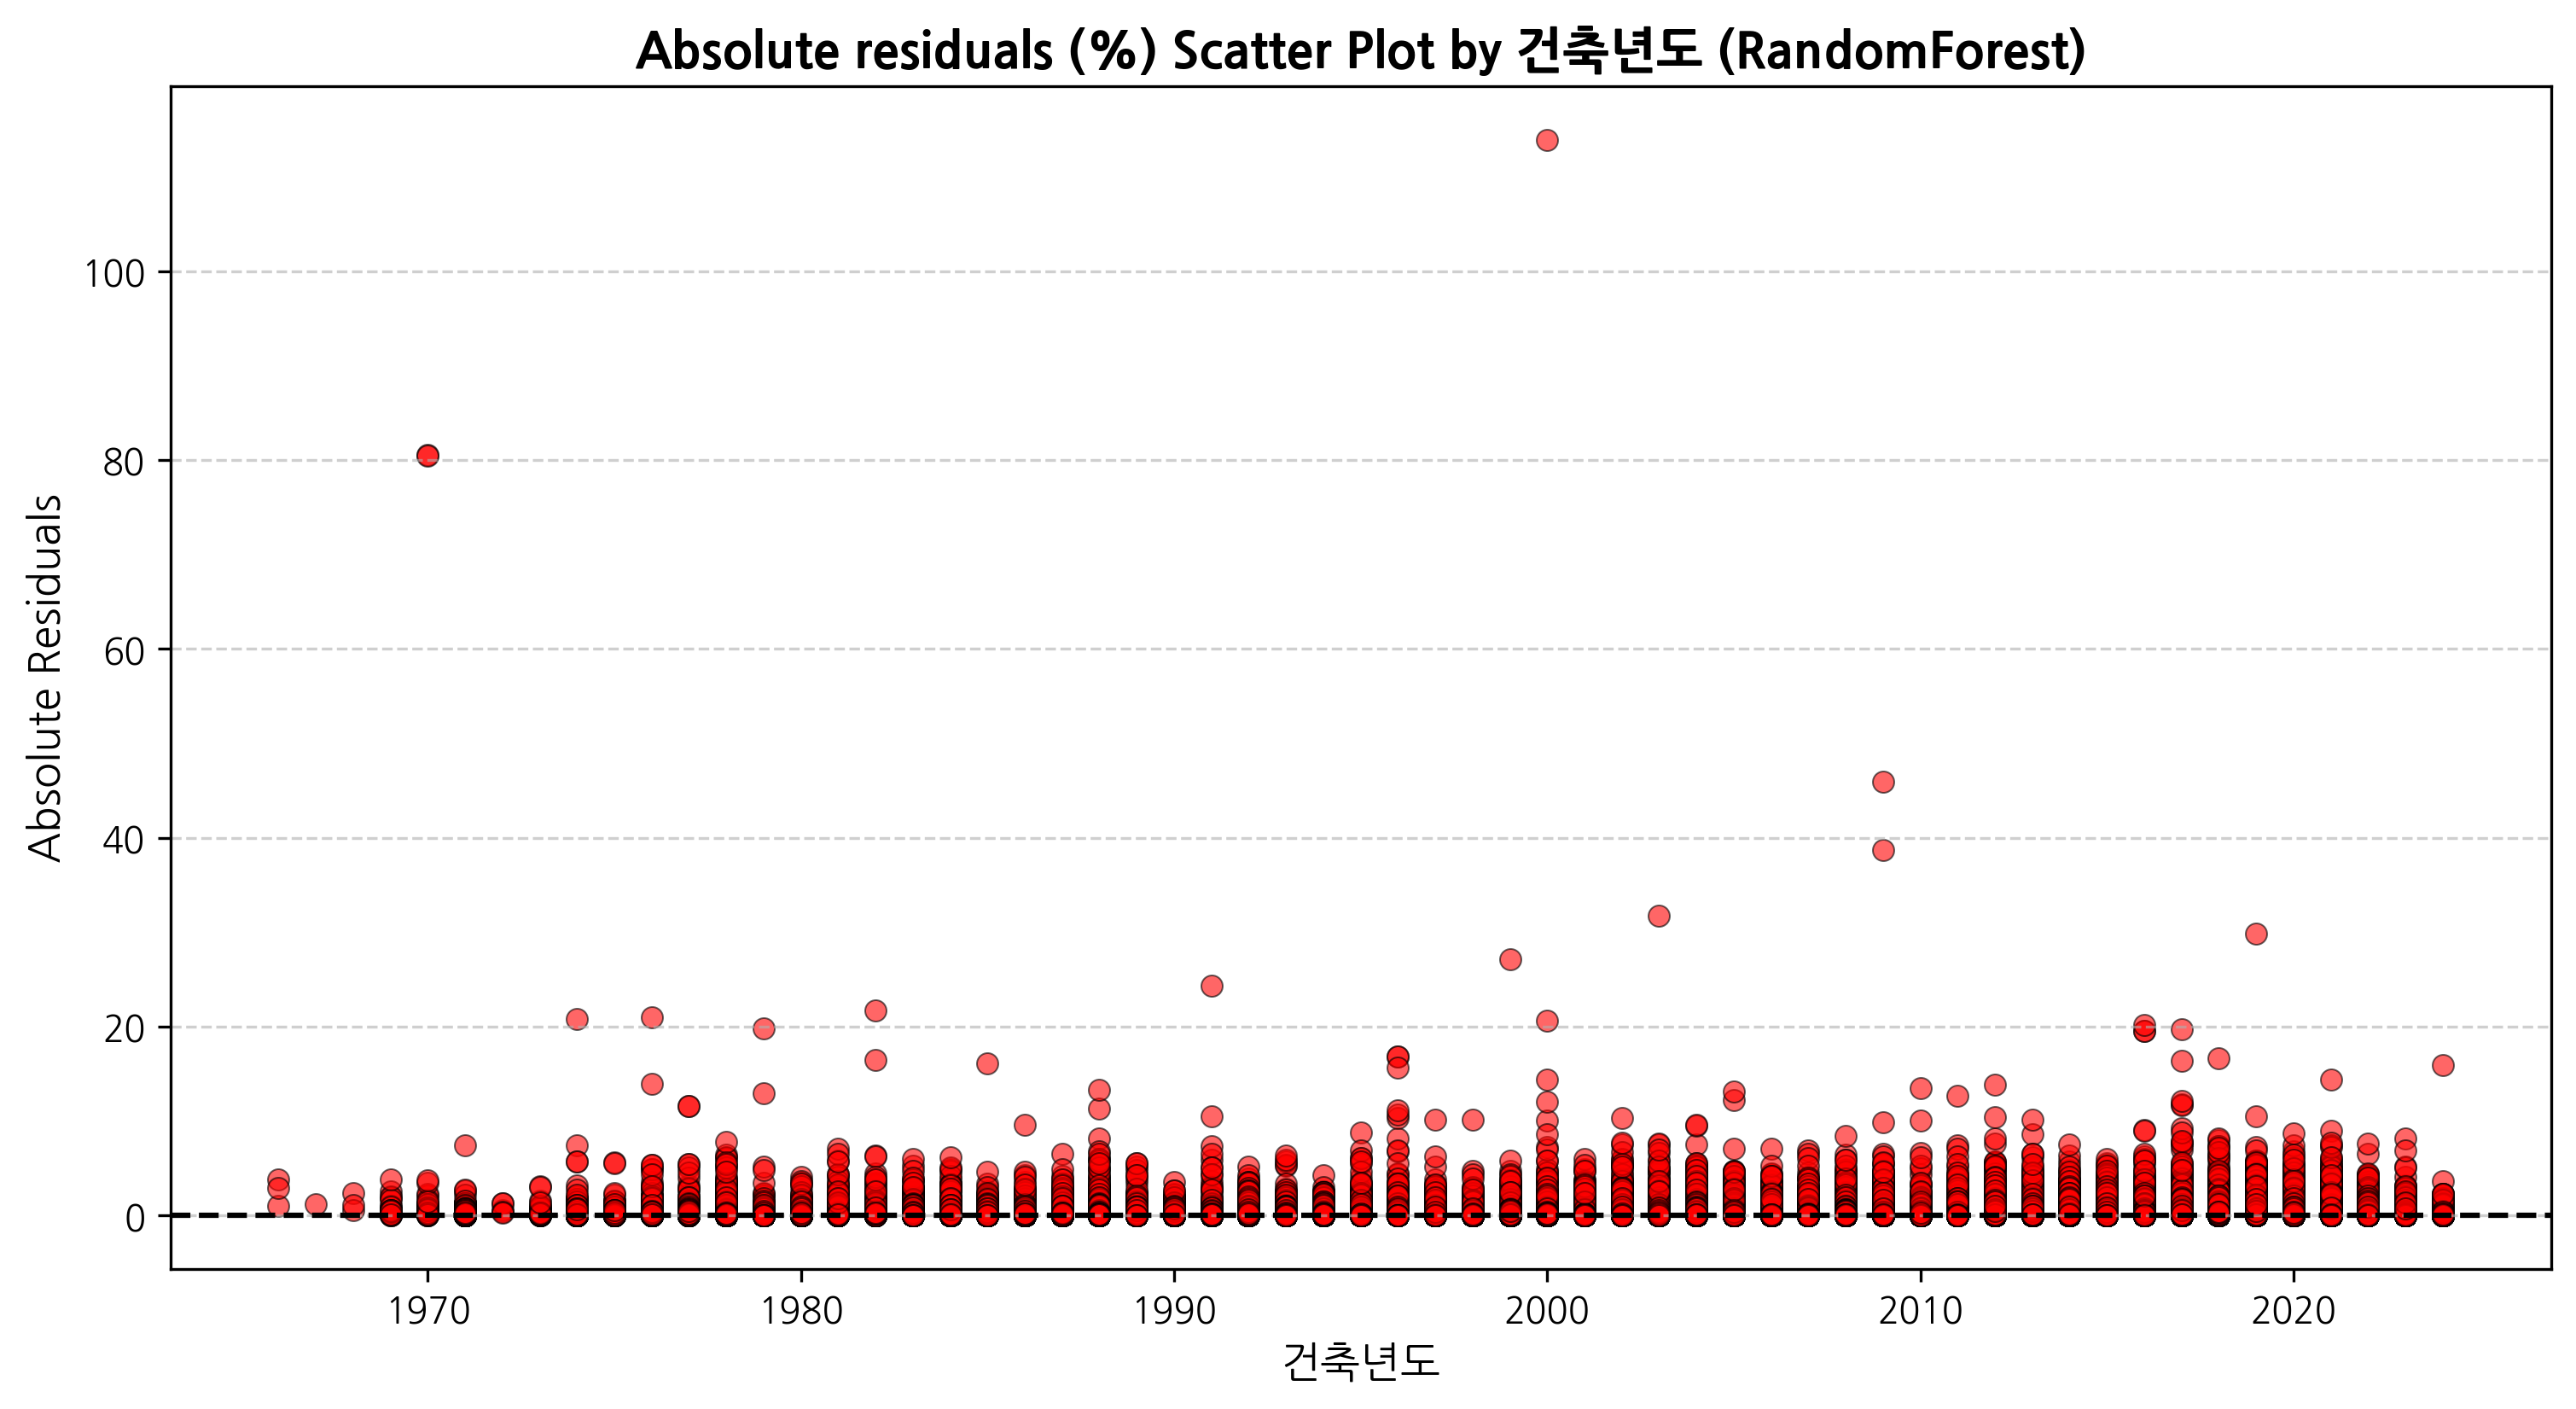

In [67]:

plot_residuals_scatter(residual_ratio, X_test["건축년도"], "건축년도", "RandomForest")

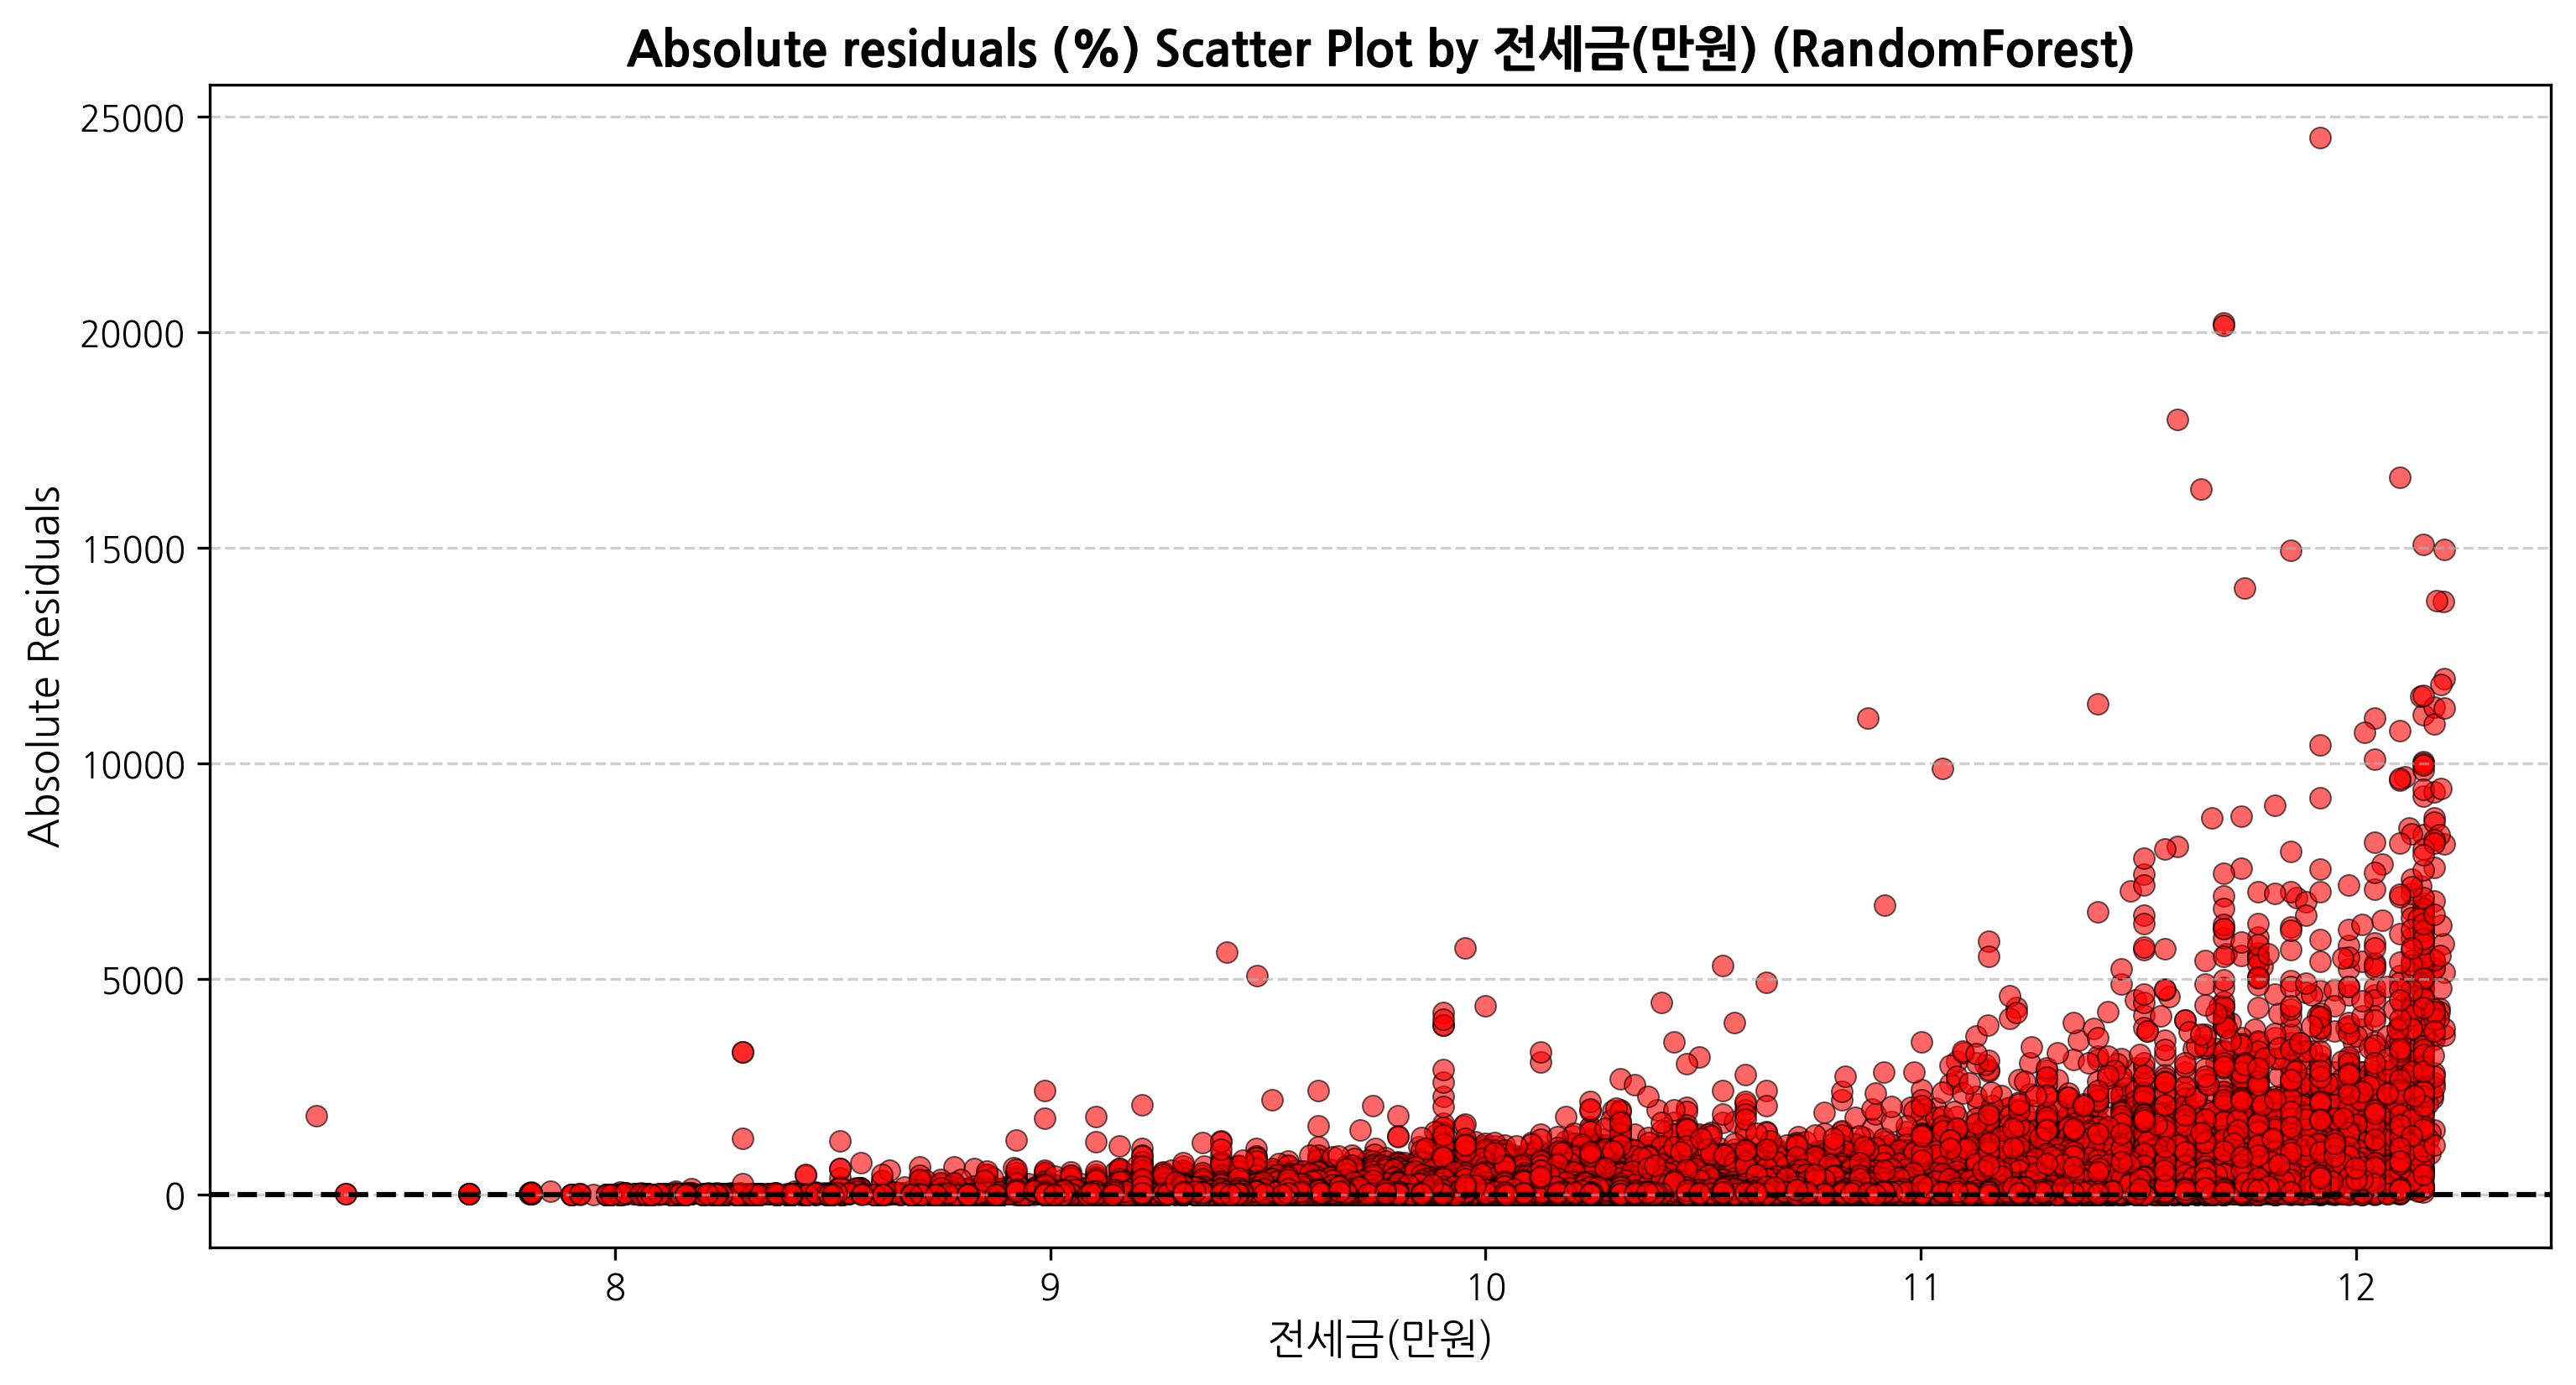

In [68]:
plot_residuals_scatter(residuals, y_test, "전세금(만원)", "RandomForest")

In [ ]:
df.info()

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importance(model, feature_names, model_name):
    """
    랜덤포레스트 모델의 Feature Importance를 시각화하는 함수.

    Parameters:
    - model: 학습된 RandomForestRegressor 모델
    - feature_names: Feature 이름 리스트 (X_train.columns)
    - model_name: 모델 이름 (문자열, 그래프 제목용)

    Returns:
    - Feature Importance DataFrame 및 시각화 그래프 출력
    """
    # ✅ Feature 중요도 추출
    feature_importances = model.feature_importances_

    # ✅ DataFrame 생성
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # ✅ 시각화
    plt.figure(figsize=(12, 6), dpi=300)
    sns.barplot(y=importance_df['Feature'], x=importance_df['Importance'], palette="viridis")
    plt.xlabel("Feature Importance Score", fontsize=12)
    plt.ylabel("Features", fontsize=12)
    plt.title(f"Feature Importance ({model_name})", fontsize=14, fontweight="bold")
    plt.gca().invert_yaxis()  # 중요도가 높은 순서로 정렬
    plt.grid(axis="x", linestyle="--", alpha=0.6)

    plt.show()

    return importance_df

# ✅ 사용 예제
# importance_df_rf = plot_feature_importance(rf_model, X_train.columns, "RandomForest")
# print(importance_df_rf.head(10))  # 상위 10개 Feature 출력

<ipython-input-69-c6eaaf7c0363>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=importance_df['Feature'], x=importance_df['Importance'], palette="viridis")


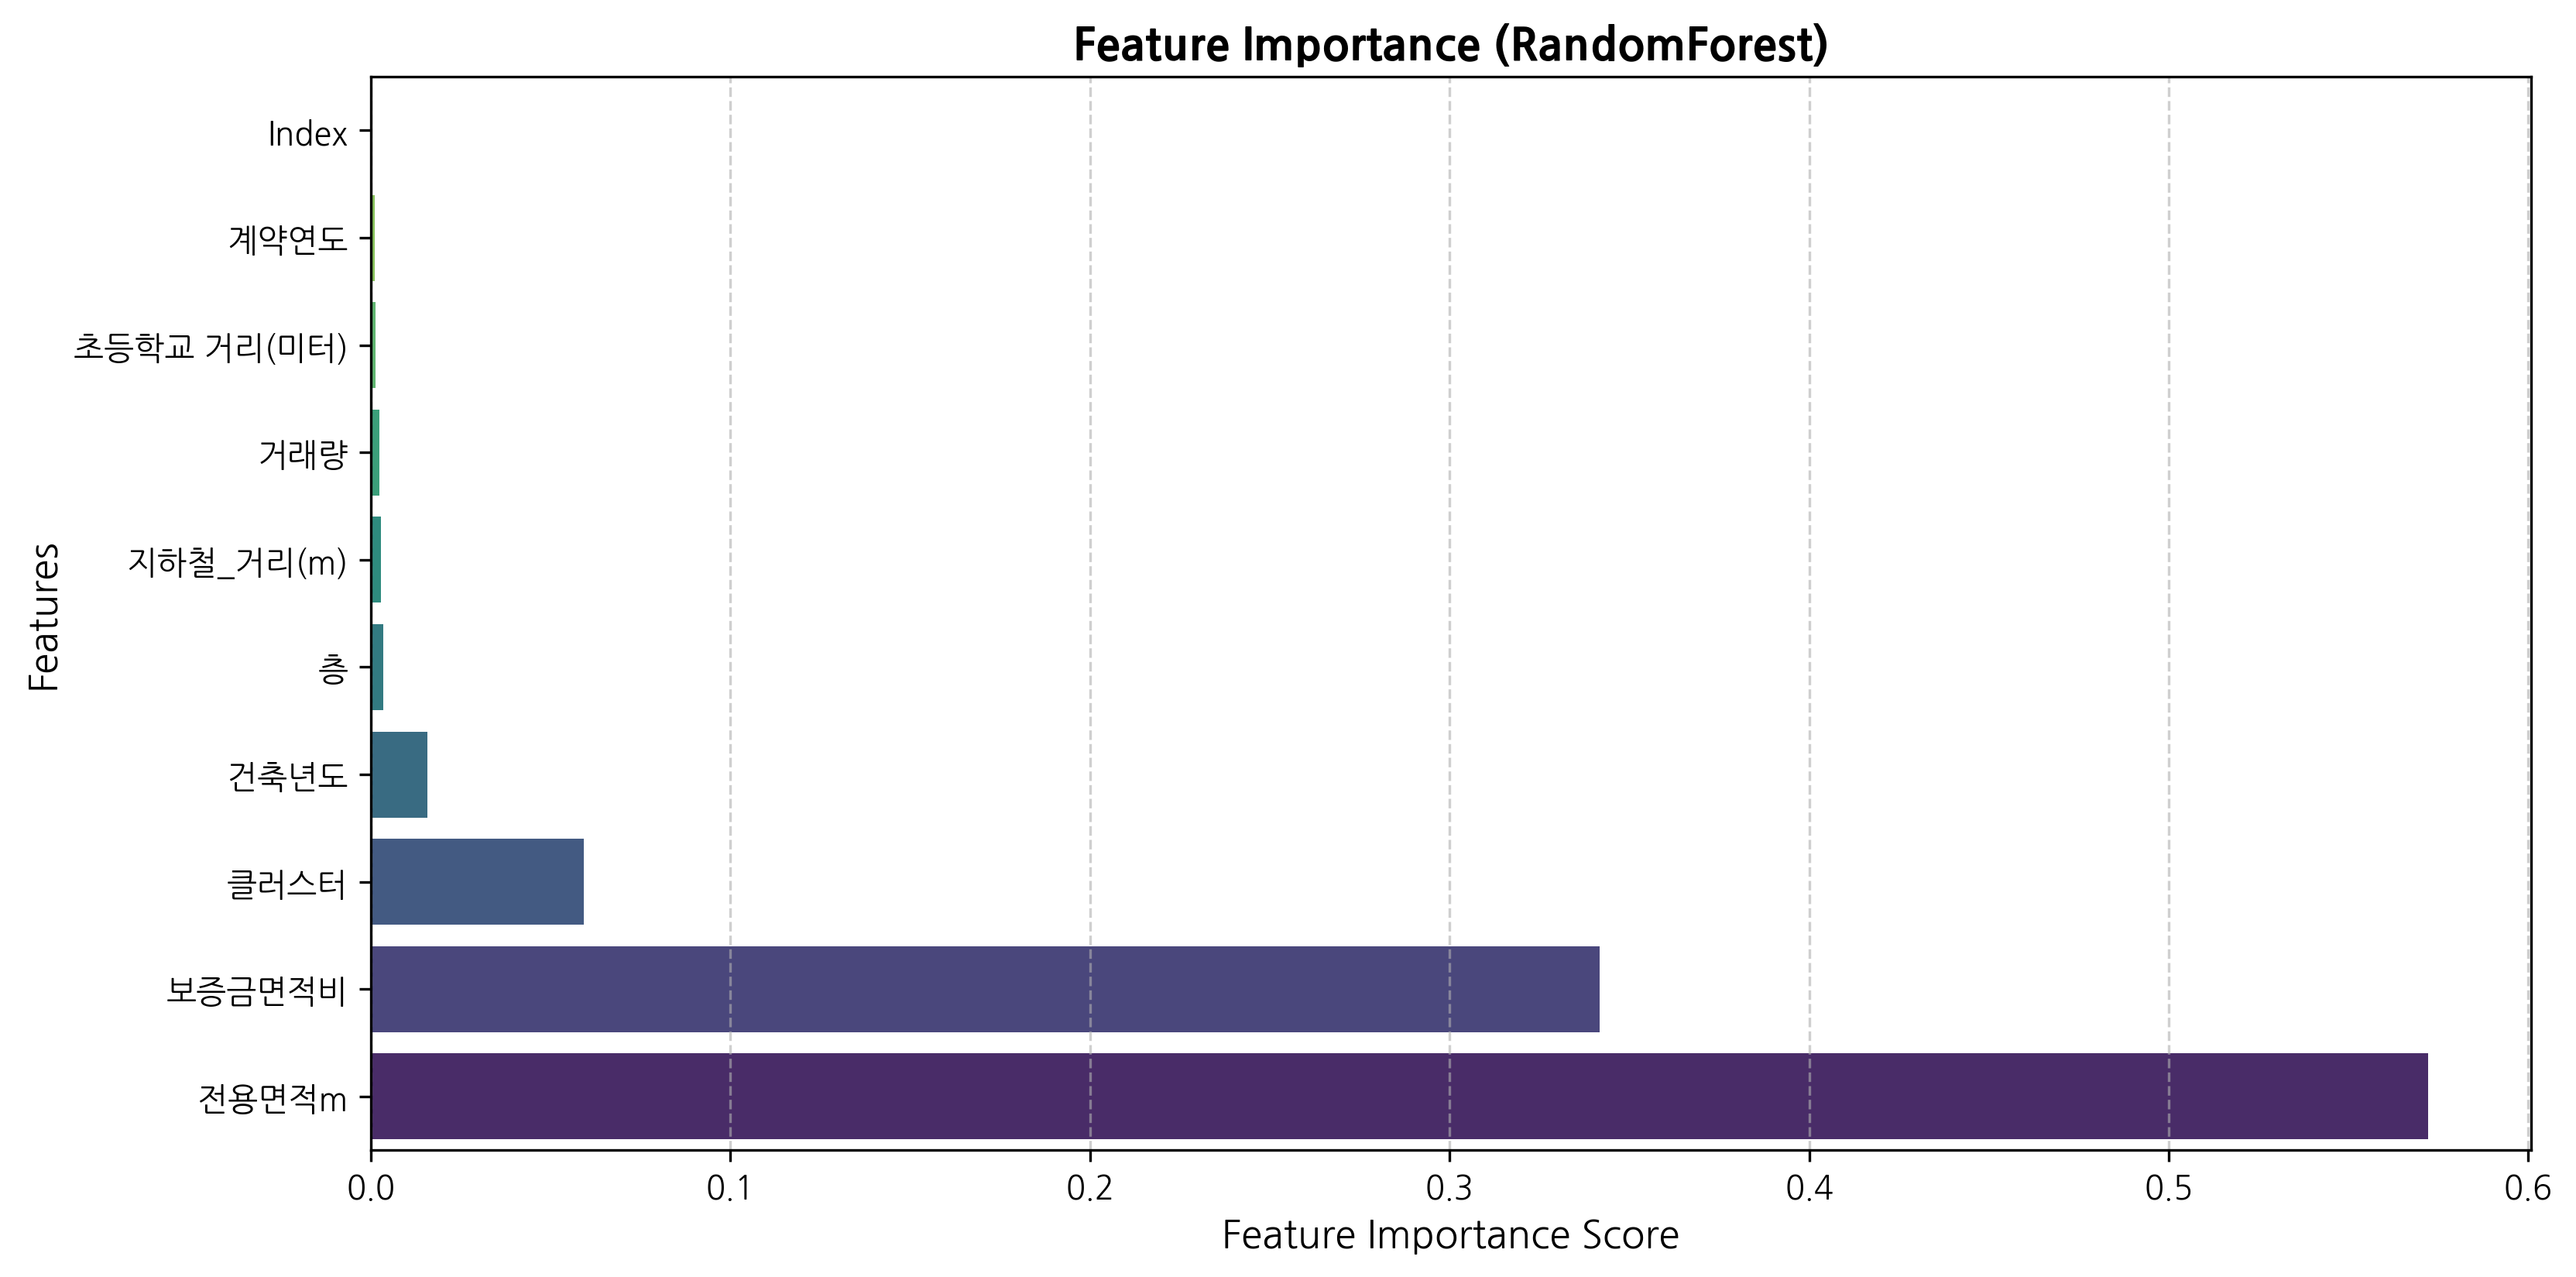

       Feature  Importance
0        전용면적m    0.572122
1       보증금면적비    0.341697
2         클러스터    0.059219
3         건축년도    0.015664
4            층    0.003484
6    지하철_거리(m)    0.002728
5          거래량    0.002396
7  초등학교 거리(미터)    0.001380
8         계약연도    0.001025
9        Index    0.000285


In [70]:
# ✅ 랜덤포레스트 Feature 중요도 분석
importance_df_rf = plot_feature_importance(rf_model, X_train.columns, "RandomForest")

# ✅ 상위 10개 Feature 출력
print(importance_df_rf.head(10))

In [71]:
li = residual_ratio[residual_ratio > 5].count()

In [72]:
print(f"5%를 초과한 예측 오차 갯수: {li}","\n5%를 초과한 예측 오차의 비율:", round(li/len(y_test),5) )

5%를 초과한 예측 오차 갯수: 279 
5%를 초과한 예측 오차의 비율: 0.00155
